# Machine Learning and AI for Autonomous Systems
## A program by IISc and TalentSprint
### Assignment: A2C

## Learning Objectives

At the end of the experiment, you will be able to :

* Understand the Actor and Critic algorithm.(A step towards PPO)
* implement Actor and Critic algorithm in a simple cartpole enviroment.

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2302794" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9008710123" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "AIAS_B2_M4_AST_11_A2C_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aias-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Information

* **VALUE BASED METHOD** \\
Value-based approaches, such as Q-learning and Deep Q-learning, involve acquiring a value function that correlates each state-action pair with a specific value. These methodologies enable the determination of the optimal action for each state, identified as the action associated with the highest value. This approach proves effective particularly in scenarios where the available actions constitute a finite set. \\

* **Policy based methods (REINFORCE with Policy Gradients)** \\
Policy-based techniques, exemplified by REINFORCE with Policy Gradients, involve the direct optimization of the policy without reliance on a value function. This approach becomes particularly advantageous when dealing with continuous or stochastic action spaces. The primary challenge lies in identifying an effective score function to evaluate the quality of a given policy, typically computed using the total rewards accrued throughout an episode. \\

However, both of these approaches exhibit significant limitations. Therefore, in the present context, we will explore a novel form of Reinforcement Learning methodology referred to as a "hybrid method," specifically the Actor-Critic approach. This method involves the utilization of two neural networks:


A2C, or Advantage Actor-Critic, is a reinforcement learning algorithm that combines elements of both policy-based and value-based methods. It is an extension of the actor-critic architecture, with the addition of an advantage function to improve learning efficiency.

Here's a breakdown of the A2C algorithm:

1. **Actor-Critic Architecture:**
   - **Actor:** This component is responsible for selecting actions based on the current policy. It maps states to actions and is essentially the policy function.
   - **Critic:** This component evaluates the actions taken by the actor by estimating the value function. It provides feedback on how good or bad the chosen actions are in a given state.

2. **Advantage Function:**
   - A key innovation in A2C is the introduction of the advantage function. The advantage function measures how much better or worse an action is compared to the average action in a given state. It helps the algorithm focus on actions that are better than expected and penalize actions that are worse.

3. **Objective Function:**
   - The overall objective function in A2C is a combination of the policy gradient and the value function. The algorithm aims to maximize the expected cumulative reward, which is the sum of the immediate rewards and the estimated future rewards.

4. **Updating Parameters:**
   - The parameters of both the actor and the critic networks are updated simultaneously. This is done using the gradient of the objective function with respect to the network parameters.



A2C is considered an improvement over traditional policy gradient methods like REINFORCE because it combines value estimation and policy improvement, leading to more stable and efficient learning.


**1. Policy Function (Actor):**

- The policy function determines the probability distribution over actions given a state.
- $\pi(a|s;\theta)$ represents the probability of taking action $a$ in state $s$ with parameters $\theta$.

**2. Value Function (Critic):**

- The value function estimates the expected cumulative reward from a given state.
- $V(s;w)$ represents the value function with parameters $w$.

**3. Advantage Function:**

- The advantage function measures the advantage of taking action $a$ in state $s$ compared to the average action.
- $A(s, a) = Q(s, a) - V(s;w)$, where $Q(s, a)$ is the estimated value of taking action $a$ in state $s$.

**4. Objective Function:**

- The overall objective function combines the policy gradient and the value function loss:

$J(\theta, w) = \mathbb{E}_{s,a} \left[ \log(\pi(a|s;\theta)) \cdot A(s, a) - \beta \cdot H(\pi(\cdot|s;\theta)) + \lambda \cdot \left(V(s;w) - Q(s, a)\right)^2 \right]$

- $\mathbb{E}_{s,a}$ denotes the expectation over states and actions.
- $H(\pi(\cdot|s;\theta))$ is the entropy of the policy, encouraging exploration.
- $\beta$ is an entropy regularization parameter.
- $\lambda$ is a critic loss coefficient.

**5. Parameter Updates:**

- The parameters $\theta$ of the policy network and $w$ of the value network are updated by taking the gradient of the objective function with respect to the parameters and performing gradient ascent:

$\theta \leftarrow \theta + \alpha_{\text{policy}} \nabla_{\theta} J(\theta, w)$

$w \leftarrow w + \alpha_{\text{value}} \nabla_{w} J(\theta, w)$

- $\alpha_{\text{policy}}$ and $\alpha_{\text{value}}$ are the learning rates for the policy and value networks, respectively.


### Import required packages

In [4]:
import numpy as np
import torch
import gym
from torch import nn
import matplotlib.pyplot as plt

In [5]:
# helper function to convert numpy arrays to tensors
def t(x): return torch.from_numpy(x).float()

**Policy Function with Neural Network:**

1. **Input:**
   - The neural network takes the state \( s \) as input. The state could be represented as a vector or a tensor, depending on the nature of the environment.

2. **Architecture:**
   - The neural network has one or more hidden layers with activation functions, such as ReLU or tanh. The architecture is designed to capture the complex relationships between states and actions.

3. **Output Layer:**
   - The output layer of the neural network corresponds to the action space. For each action \( a \) in the action space, there is an output node. The activation function used in the output layer is often softmax, ensuring that the outputs form a valid probability distribution over actions.

4. **Parameters \($ \theta $\):**
   - The weights and biases of the neural network constitute the parameters \( \theta \) of the policy function. These parameters are learned during the training process.

5. **Probability Distribution:**
   - The probability of taking each action \( a \) in a given state \( s \) is obtained by applying the softmax function to the output of the neural network:
     $[ \pi(a|s;\theta) = \frac{e^{f(a|s;\theta)}}{\sum_{a'} e^{f(a'|s;\theta)}} ]$
     where $\( f(a|s;\theta) \)$ is the logit (raw output) for action $\( a \)$ produced by the neural network.

6. **Training:**
   - During training, the neural network is updated using a combination of policy gradient and value-based objectives, as described in the A2C algorithm. The gradient of the policy function with respect to its parameters$ ( \theta )$ is computed and used to update the weights through backpropagation.



In [6]:
# Actor module, categorical actions only
class Actor(nn.Module):
    def __init__(self, state_dim, n_actions):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(state_dim, 64),
            nn.Tanh(),
            nn.Linear(64, 32),
            nn.Tanh(),
            nn.Linear(32, n_actions),
            nn.Softmax()
        )

    def forward(self, X):
        return self.model(X)

**Value Function with Neural Network:**

1. **Input:**
   - The neural network takes the state $( s )$ as input, just like the policy network.

2. **Architecture:**
   - The value function neural network can have a similar or different architecture compared to the policy network. It typically consists of one or more hidden layers with activation functions, capturing the complex relationships between states and their corresponding values.

3. **Output Layer:**
   - The output layer of the value network typically has a single node, representing the estimated value of the state. There is no need for an activation function in this layer, as the value is a continuous scalar.

4. **Parameters $( w )$:**
   - The weights and biases of the neural network constitute the parameters \( w \) of the value function. These parameters are learned during the training process independently of the policy network.

5. **Value Estimation:**
   - The output of the value function neural network represents the estimated value of the state $\( s \):
     \[ V(s;w) = f(s;w) \]$
     where $\( f(s;w) \)$ is the output of the neural network.




In [7]:
# Critic module
class Critic(nn.Module):
    def __init__(self, state_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(state_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, X):
        return self.model(X)

In [8]:
# Memory
# Stores results from the networks, instead of calculating the operations again from states, etc.
class Memory():
    def __init__(self):
        self.log_probs = []
        self.values = []
        self.rewards = []
        self.dones = []

    def add(self, log_prob, value, reward, done):
        self.log_probs.append(log_prob)
        self.values.append(value)
        self.rewards.append(reward)
        self.dones.append(done)

    def clear(self):
        self.log_probs.clear()
        self.values.clear()
        self.rewards.clear()
        self.dones.clear()

    def _zip(self):
        return zip(self.log_probs,
                self.values,
                self.rewards,
                self.dones)

    def __iter__(self):
        for data in self._zip():
            return data

    def reversed(self):
        for data in list(self._zip())[::-1]:
            yield data

    def __len__(self):
        return len(self.rewards)


The **CartPole environment** is a classic problem in reinforcement learning and is often used as a benchmark for testing and developing reinforcement learning algorithms. It is a simple physics simulation involving a pole attached to a cart. The goal is to balance the pole on the cart for as long as possible by moving the cart left or right.

**Environment Description:**

1. **State Space:**
   - The state space consists of four continuous variables:
     - Cart position
     - Cart velocity
     - Pole angle
     - Pole angular velocity

2. **Action Space:**
   - The action space is discrete and consists of two possible actions:
     - Move the cart to the left
     - Move the cart to the right

3. **Reward:**
   - A reward of +1 is given for every time step the pole remains upright. The goal is to accumulate as much reward as possible by keeping the pole balanced.

4. **Termination:**
   - The episode terminates if one of the following conditions is met:
     - The cart position goes outside the pre-defined range.
     - The pole angle exceeds a certain threshold.
     - A maximum number of time steps is reached.






In [9]:
env = gym.make("CartPole-v1")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [10]:
# config
state_dim = env.observation_space.shape[0]
n_actions = env.action_space.n
actor = Actor(state_dim, n_actions)
critic = Critic(state_dim)
adam_actor = torch.optim.Adam(actor.parameters(), lr=1e-3)
adam_critic = torch.optim.Adam(critic.parameters(), lr=1e-3)
gamma = 0.99
memory = Memory()
max_steps = 200

In [11]:
# train function
def train(memory, q_val):
    values = torch.stack(memory.values)
    q_vals = np.zeros((len(memory), 1))

    # target values are calculated backward
    # it's super important to handle correctly done states,
    # for those cases we want our to target to be equal to the reward only
    for i, (_, _, reward, done) in enumerate(memory.reversed()):
        q_val = reward + gamma*q_val*(1.0-done)
        q_vals[len(memory)-1 - i] = q_val # store values from the end to the beginning

    advantage = torch.Tensor(q_vals) - values

    critic_loss = advantage.pow(2).mean()
    adam_critic.zero_grad()
    critic_loss.backward()
    adam_critic.step()

    actor_loss = (-torch.stack(memory.log_probs)*advantage.detach()).mean()
    adam_actor.zero_grad()
    actor_loss.backward()
    adam_actor.step()

In [12]:
episode_rewards = []

for i in range(1000):
    done = False
    total_reward = 0
    state = env.reset()
    steps = 0

    while not done:
        probs = actor(t(state))
        dist = torch.distributions.Categorical(probs=probs)
        action = dist.sample()

        next_state, reward, done, info = env.step(action.detach().data.numpy())

        total_reward += reward
        steps += 1
        memory.add(dist.log_prob(action), critic(t(state)), reward, done)

        state = next_state

        # train if done or num steps > max_steps
        if done or (steps % max_steps == 0):
            last_q_val = critic(t(next_state)).detach().data.numpy()
            train(memory, last_q_val)
            memory.clear()

    episode_rewards.append(total_reward)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


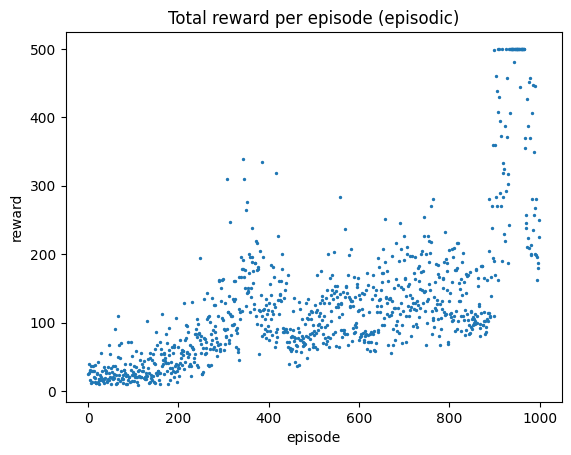

In [13]:
plt.scatter(np.arange(len(episode_rewards)), episode_rewards, s=2)
plt.title("Total reward per episode (episodic)")
plt.ylabel("reward")
plt.xlabel("episode")
plt.show()

### Please answer the questions below to complete the experiment:




In [14]:
# @title  What is the role of the advantage function in A2C? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = " It measures the advantage of each action in a given state" #@param ["","It calculates the expected cumulative reward"," It measures the advantage of each action in a given state", " It defines the policy gradient", "It updates the value function"]

In [15]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [16]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Good" #@param {type:"string"}


In [17]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [18]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [19]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [20]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1203
Date of submission:  16 Aug 2024
Time of submission:  20:47:17
View your submissions: https://aias-iisc.talentsprint.com/notebook_submissions
